# World and Simulator with ODE solver

If you read through Model basics, it is NOT difficult to use **World** and **Simulator**.
**volume** and **{'C':60}** is equivalent of the **World** and **solver** is the **Simulator** below.

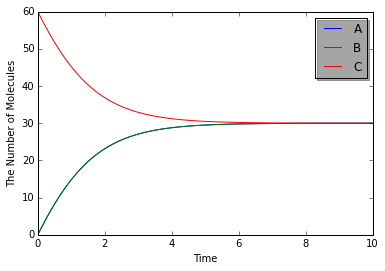

In [2]:
%matplotlib inline
import numpy
from ecell4 import *

with reaction_rules():
    A + B == C | (0.01, 0.3)

y = run_simulation(numpy.linspace(0, 10, 100), {'C': 60}, volume=1.0)


Here we give you a breakdown for **run_simulation**.
**run_simulation** use ODE simulator by default, so we create ODE world step by step.

## Creating ODE world

You can create world like this.

In [3]:
w = ode.ODEWorld(Real3(1, 1, 1))

**Real3** is a coordinate vector.
In this example, the first argument for ODEWorld constructor is a cube.
Note that you can NOT use volume for ode.ODEWorld argument, like **run_simulation** argument.

Now you created a cube box for simulation, next let's throw in molecules into it.

In [4]:
w = ode.ODEWorld(Real3(1, 1, 1))
w.add_molecules(Species('C'), 60)
print(w.t(), w.num_molecules(Species('C')))  # will return (0.0, 60)

(0.0, 60)


Use **add_molecules** to add molecules, **remove_molecules** to remove molecules, **num_molecules** to know the number of molecules.
First argument for each method is the **Species** you want to know.
You can get current time by **t** method.
However the number of molecules in ODE solver is real number, in these **_molecules** functions work only for integer number.
If you use real number in ODE, use **set_value** and **get_value**.


## How to use Real3

Before the detail of **Simulator**, we explaing more about **Real3**.

In [5]:
pos = Real3(1, 2, 3)
print(pos)  # will print <ecell4.core.Real3 object at 0x7f44e118b9c0>
print(tuple(pos))  # will print (1.0, 2.0, 3.0)

(1.0, 2.0, 3.0)


You can not print **Real3** object directly.
You need to convert **Real3** to Python tuple or list once.

In [6]:
pos1 = Real3(1, 1, 1)
x, y, z = pos[0], pos[1], pos[2]
pos2 = pos1 + pos1
pos3 = pos1 * 3
pos4 = pos1 / 5
print(length(pos1))  # will print 1.73205080757
print(dot_product(pos1, pos3))  # will print 9.0

1.73205080757
9.0


You can use basic function like dot_product.
Of course you can convert Real3 to numpy array too.

In [7]:
a = numpy.asarray(tuple(Real3(1, 2, 3)))
print(a)  # will print [ 1.  2.  3.]

[ 1.  2.  3.]


## Creating and Running ODESimulator

You can create a Simulator with Model and World like 

In [8]:
with reaction_rules():
    A + B > C | 0.01  # equivalent to create_binding_reaction_rule
    C > A + B | 0.3   # equivalent to create_unbinding_reaction_rule

m = get_model()

sim = ode.ODESimulator(m, w)
sim.run(10.0)

then call **run** method, the simulation will run.
In this example the simulation runs for 10seconds.

You can check the state of the **World** like this.

In [9]:
print(w.t(), w.num_molecules(Species('C')))  # will return (10.0, 30)

(10.0, 30)


You can see that the number of the **Species** **C** decreases from 60 to 30.

**World** describes the state of a timepoint, so you can NOT see the transition of the simulation with the **World**.
To obtain the time-series result, use **Observer**.

In [10]:
obs = FixedIntervalNumberObserver(0.1, ('A', 'C'))
sim.run(10.0, obs)
print(obs.data())  # will return [[0.0, 0.0, 60.0], ..., [10.0, 29.994446899698026, 30.005553100301967]]

[[10.0, 29.994445225953793, 30.005554774046203], [10.1, 29.994923291781845, 30.00507670821815], [10.2, 29.995360215494838, 30.00463978450516], [10.3, 29.99575953741398, 30.004240462586015], [10.4, 29.996124493269757, 30.00387550673024], [10.5, 29.996458040397858, 30.00354195960214], [10.6, 29.99676288168368, 30.003237118316317], [10.7, 29.99704148744875, 30.002958512551245], [10.8, 29.99729611545562, 30.002703884544378], [10.9, 29.997528829192905, 30.00247117080709], [11.0, 29.997741514588153, 30.002258485411843], [11.1, 29.997935895283558, 30.00206410471644], [11.2, 29.99811354659805, 30.001886453401948], [11.3, 29.998275908288566, 30.00172409171143], [11.4, 29.99842429621383, 30.001575703786166], [11.5, 29.998559912994793, 30.001440087005204], [11.6, 29.998683857758166, 30.00131614224183], [11.7, 29.99879713504173, 30.001202864958266], [11.8, 29.99890066293361, 30.001099337066385], [11.9, 29.998995280511267, 30.00100471948873], [12.0, 29.999081754640535, 30.00091824535946], [12.1, 29

There are several types of **Observer**s for E-Cell4.
**FixedIntervalNumberObserver** is the simplest **Observer** to obtain the time-series result.
As its name suggests, this **Observer** records the number of molecules for each time-step.
The 1st argument is the time-step, the 2nd argument is the molecule types.
You can check the result with **data** method, but there is a shortcut for this

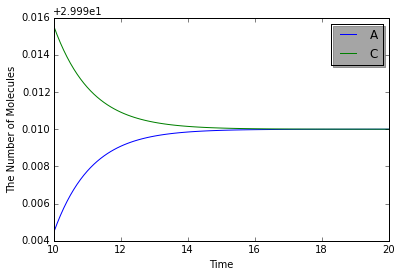

In [11]:
viz.plot_number_observer(obs)

This plots the time-series result easily.

We explained the internal of **run_simulation** function.
When you change the **World** after creating the **Simulator**, you need to indicate it to **Simulator**.
So do NOT forget to call

In [12]:
sim.initialize()

## Switching the solver
It is NOT difficult to switch the solver to stochastic method, as we showed **run_simulation**.

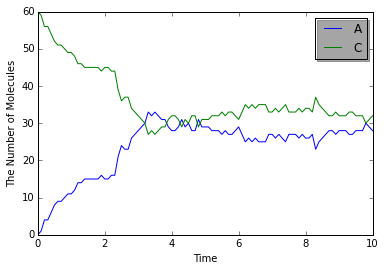

In [13]:
from ecell4 import *

with reaction_rules():
    A + B == C | (0.01, 0.3)

m = get_model()

# ode.ODEWorld -> gillespie.GillespieWorld
w = gillespie.GillespieWorld(Real3(1, 1, 1))
w.add_molecules(Species('C'), 60)

# ode.ODESimulator -> gillespie.GillespieSimulator
sim = gillespie.GillespieSimulator(m, w)
obs = FixedIntervalNumberObserver(0.1, ('A', 'C'))
sim.run(10.0, obs)

viz.plot_number_observer(obs)

**World** and **Simulator** do NOT change the **Model**, so you can switch several simulators for 1 model.